In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
input_data = "/Users/divyareddy/Desktop/ML Project/End-End-ML-Project/Notebooks/data/StudentsPerformance.csv"
data = pd.read_csv(input_data)
print("shape of the data", data.shape)
print("Columns of dataframe",data.columns)

shape of the data (1000, 8)
Columns of dataframe Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


The dataset has 8 features and 1000 rows 

In [3]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes!='O']
categorical_features =[feature for feature in data.columns if data[feature].dtypes=='O']
print("Numerical features",numerical_features)
print("categorical features", categorical_features)
df=data.copy()
df.isnull().sum()

Numerical features ['math score', 'reading score', 'writing score']
categorical features ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values present in the features of the data set.


Exploratory Data Analysis

1. Inorder to understand the students performance, we ca create a new column as total_marks that takes an average of the math, reading and writing score.
2. Identify if there are any independent factors linearly dependent on each other using Variace inflation factor and correalation matrix.
2. Perform bi variate analysis to understand the influece of the other independent variable on students performace.

In [4]:
df['Total_score'] = df.apply(lambda row: round(np.mean([row['math score'], row['reading score'],row['writing score']]),2), axis =1)
print(df['Total_score'])
print(df.describe())

0      72.67
1      82.33
2      92.67
3      49.33
4      76.33
       ...  
995    94.00
996    57.33
997    65.00
998    74.33
999    83.00
Name: Total_score, Length: 1000, dtype: float64
       math score  reading score  writing score  Total_score
count  1000.00000    1000.000000    1000.000000  1000.000000
mean     66.08900      69.169000      68.054000    67.770580
std      15.16308      14.600192      15.195657    14.257311
min       0.00000      17.000000      10.000000     9.000000
25%      57.00000      59.000000      57.750000    58.330000
50%      66.00000      70.000000      69.000000    68.330000
75%      77.00000      79.000000      79.000000    77.670000
max     100.00000     100.000000     100.000000   100.000000


The average total marks of the sample of 1000 students is 67.77 out of 100 marks 
Iteresting observations is that the mean as well as the median of the data are almost same. I believe this to a indicative of normal distribution.
Moreover, more than 50% of the sample is scoring 68 marks and 25% of those scored above 77 marks 

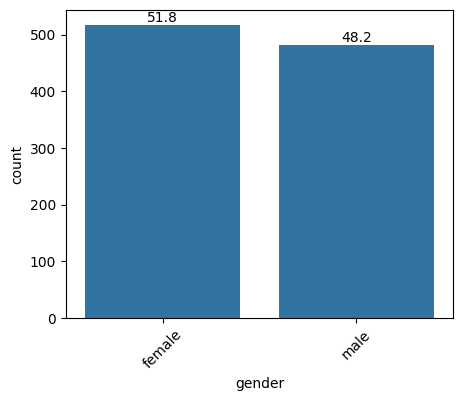

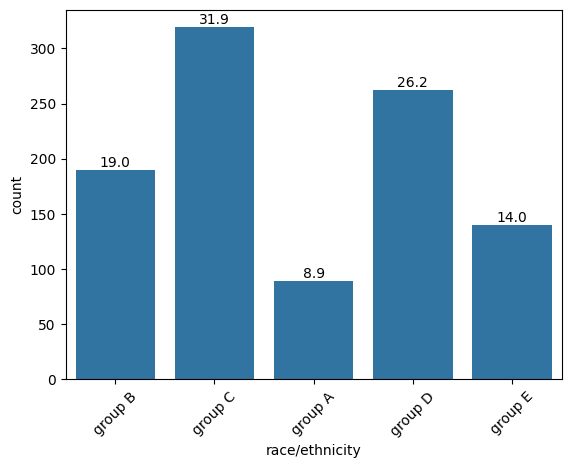

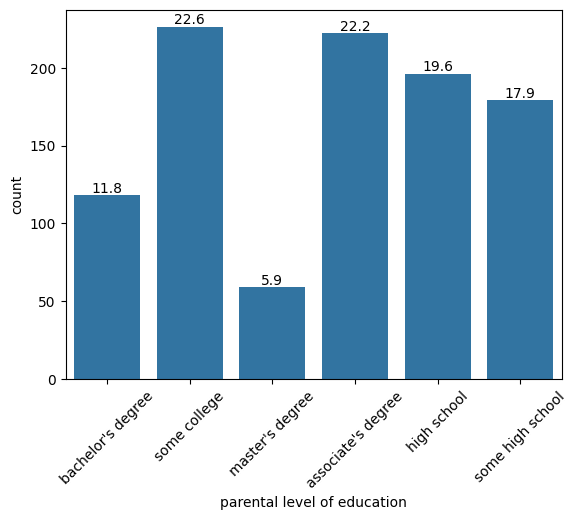

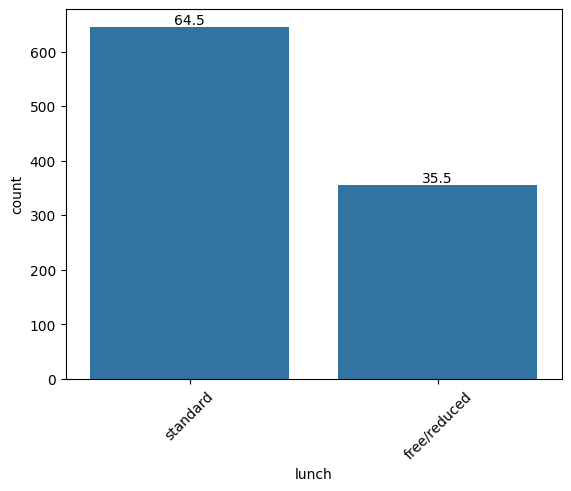

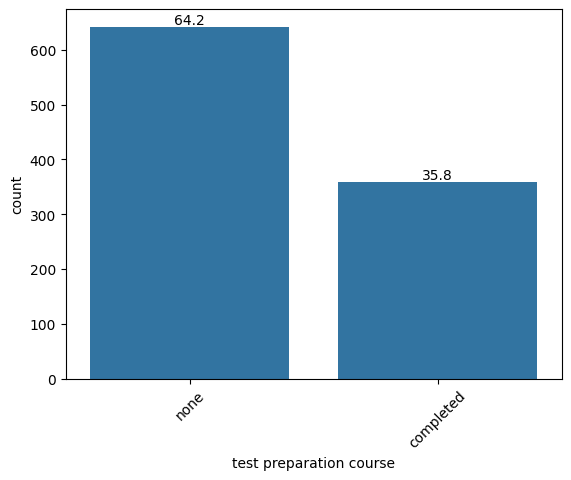

In [5]:
# Performing Univariate analyis 
#categorical features ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
# proportion of students in total 
plt.figure(figsize=(5,4))
for feature in categorical_features:
    ax = sns.countplot(data = df, x= feature)
    for bar in ax.patches:
        height = bar.get_height()
        proportion =  round(( height/len(df[feature]) ) *100,2)
        ax.text(bar.get_x()+bar.get_width() / 2, height+0.1, str(proportion), 
                ha='center', va='bottom')
    plt.xticks(rotation=45)
    plt.show()
# proportions of student in gender who scored above mean 

Interpretation of Univariate analysis
1. Both male and female proportion among the sample is almost similar. They are slightly few female students than male
2. Group C (32%) and Group D (26%) are present in larger numbers than other groups leaving group A (9%) to rank the least in terms of numbers
3. 68% of the students can afford to pat standard lunch while the rest 32% get free lunches or reduced payment for lunches ( assumption is indicative of parents economical status)
4. only 36% of the student completed their test preparation.

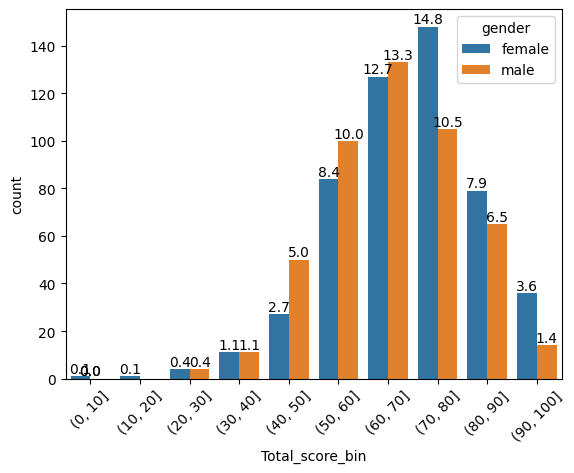

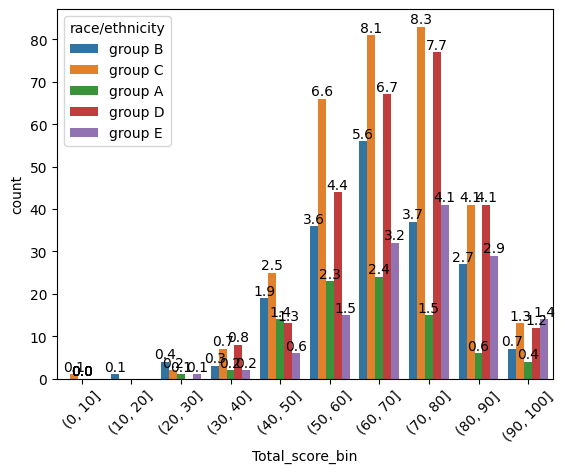

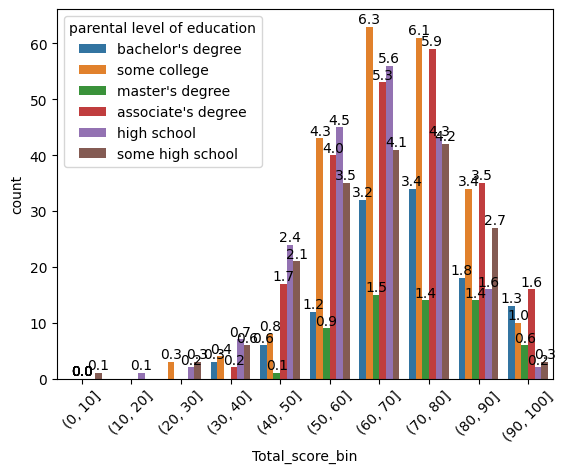

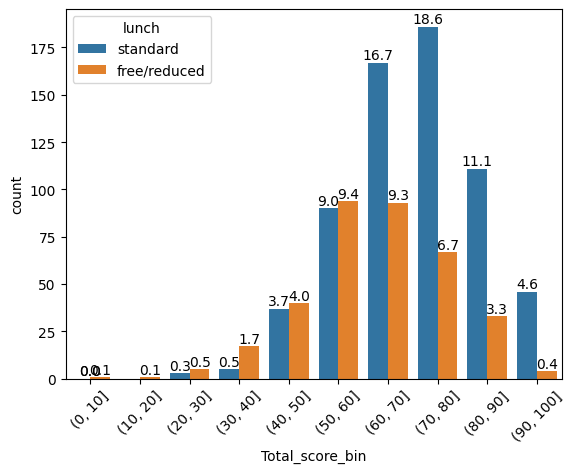

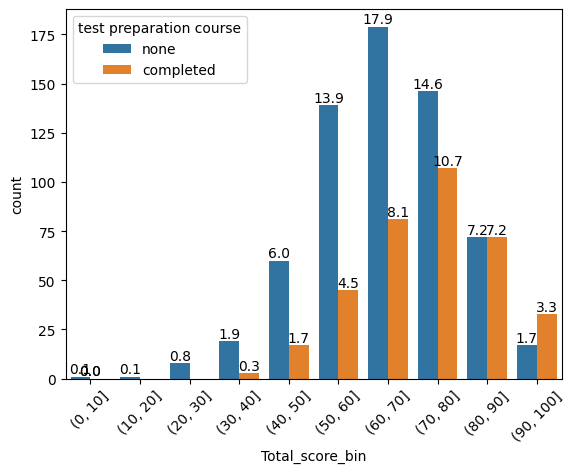

In [6]:
# bivariate analysis : Relation between their avg score and other independent features
# create bins in the interval of 10 
x = df['Total_score']
rg = list(range(0,110,10))
df['Total_score_bin']=pd.cut(x=x,bins=rg,right=True)
for feature in categorical_features:
    ax = sns.countplot(x=df['Total_score_bin'], data=df,hue=feature)
    for bar in ax.patches:
        height = bar.get_height()
        value = round(height/len(df[feature])*100,2)
        ax.text(bar.get_x()+bar.get_width()/2, height+0.1,value, ha='center', va='bottom')
    plt.xticks(rotation=45)
    plt.show()


Interpretations that can be drawn:
1. Interestingly, we found that the students who didnot complete their preparation for their test scored well when compared to whose who didnot.
2. Among all the students who completed the test prep, no one scored less than 30.
3. 

In [20]:
df = df.drop(columns=['Total_score_bin'],axis=1)
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total_score'],
      dtype='object')


In [60]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numerical_columns = ['reading score', 'writing score','math score', ]
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
num_pipeline = Pipeline(
    steps = [
        ('handle_missing_values',SimpleImputer(strategy='median')),
        #('scaling', StandardScaler())
        ]
)  
cat_pipeline = Pipeline(
    steps = [
        ('handle_missing_values',SimpleImputer(strategy = "most_frequent")),
        ('encoding', OneHotEncoder(drop='first')),
        ]
)

preprocessor =ColumnTransformer(
    [
    ('cat',cat_pipeline,categorical_columns),
    ('num',num_pipeline,numerical_columns),
    ]
)
print(list(df.columns))
print("preprcessed obj", preprocessor)
#print(df.iloc[0:2,:])
preprocessed_data = preprocessor.fit_transform(df)
print(preprocessed_data)
print(preprocessed_data.shape)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'Total_score']
preprcessed obj ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('handle_missing_values',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OneHotEncoder(drop='first'))]),
                                 ['gender', 'race/ethnicity',
                                  'parental level of education', 'lunch',
                                  'test preparation course']),
                                ('num',
                                 Pipeline(steps=[('handle_missing_values',
                                                  SimpleImputer(strategy='median'))]),
                                 ['reading score', 'writing score',
     

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x = preprocessed_data[:,:-1]
y = preprocessed_data[:,-1]

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=43)

model1 = LinearRegression()
model1.fit(x_train, y_train)
results =  model1.predict(x_test)
print(results)
print("r2 square for linear regrerssion model", r2_score(y_test, results))


[ 50.80270638  46.500747    62.36926145  60.06405746  90.64588718
  64.09033183  87.05836684  62.12718514  82.82357076  51.05561225
  52.74519613  82.94546045  56.95540354  77.0794672   50.61159766
  53.29125848  70.66328143  60.89277372  72.36199957  54.67890105
  72.19143558  60.03212194  53.99542513  60.15766452  81.04172318
  67.48595875  62.23439086  94.59065783  70.17552844  49.06739438
  60.63747026  81.7604883   71.57677572  82.36680182  74.86778064
  68.99234742  64.46397176  59.93458288  72.76518121  40.41628204
  54.42460827  53.27928692  51.77127328  88.4958686   71.23547499
  48.56565808  70.19877523  95.29486196  60.10309488  52.95597538
  73.94046994  88.35683909  44.47748983  85.69561846  89.71831825
  69.10534994  58.89458081  81.95011775  67.59737669  67.23738075
  57.76957641  72.57696987  71.4267572   68.04150602  52.94119058
  80.78425166  68.09457832  55.13297132  89.69571109  55.26235465
  60.89664574  76.66653245  54.1744891   64.38192623  60.26065621
 105.47852